# Multiple Linear Regression Practice Notebook

This notebook contains practice exercises and examples for multiple linear regression (MLR) analysis. The notebook includes data preparation, model training, and evaluation steps.

# Import Libraries

In [1]:
# This cell contains code for step 2
# This cell contains code for step 1
import pandas as pd
import scipy
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
# This cell contains code for step 5
ipl_auction_df = pd.read_csv('IPLData.csv')

In [3]:
# This cell contains code for step 6
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

# displaying features


In [4]:
# This cell contains code for step 8
X_features

['AGE',
 'COUNTRY',
 'PLAYING ROLE',
 'T-RUNS',
 'T-WKTS',
 'ODI-RUNS-S',
 'ODI-SR-B',
 'ODI-WKTS',
 'ODI-SR-BL',
 'CAPTAINCY EXP',
 'RUNS-S',
 'HS',
 'AVE',
 'SR-B',
 'SIXERS',
 'RUNS-C',
 'WKTS',
 'AVE-BL',
 'ECON',
 'SR-BL']

# displaying unique featuers of the playing role

In [5]:
# This cell contains code for step 10
ipl_auction_df

Sl.NO.   PLAYER NAME  AGE COUNTRY   TEAM PLAYING ROLE  T-RUNS  T-WKTS  \
0         1   Abdulla, YA    2      SA   KXIP   Allrounder       0       0   
1         2  Abdur Razzak    2     BAN    RCB       Bowler     214      18   
2         3   Agarkar, AB    2     IND    KKR       Bowler     571      58   
3         4     Ashwin, R    1     IND    CSK       Bowler     284      31   
4         5  Badrinath, S    2     IND    CSK      Batsman      63       0   
..      ...           ...  ...     ...    ...          ...     ...     ...   
125     126     Yadav, AS    2     IND     DC      Batsman       0       0   
126     127   Younis Khan    2     PAK     RR      Batsman    6398       7   
127     128  Yuvraj Singh    2     IND  KXIP+      Batsman    1775       9   
128     129   Zaheer Khan    2     IND    MI+       Bowler    1114     288   
129     130    Zoysa, DNT    2      SL     DC       Bowler     288      64   

     ODI-RUNS-S  ODI-SR-B  ...    SR-B  SIXERS  RUNS-C  WKTS  AVE-BL   ECON  \
0             0      0.00  ...    0.00       0     307    15   20.47   8.90   
1           657     71.41  ...    0.00       0      29     0    0.00  14.50   
2          1269     80.62  ...  121.01       5    1059    29   36.52   8.81   
3           241     84.56  ...   76.32       0    1125    49   22.96   6.23   
4            79     45.93  ...  120.71      28       0     0    0.00   0.00   
..          ...       ...  ...     ...     ...     ...   ...     ...    ...   
125           0      0.00  ...  125.64       2       0     0    0.00   0.00   
126        6814     75.78  ...   42.85       0       0     0    0.00   0.00   
127        8051     87.58  ...  131.88      67     569    23   24.74   7.02   
128         790     73.55  ...   91.67       1    1783    65   27.43   7.75   
129         343     95.81  ...  122.22       0      99     2   49.50   9.00   

     SR-BL  AUCTION YEAR  BASE PRICE  SOLD PRICE  
0    13.93          2009       50000       50000  
1     0.00          2008       50000       50000  
2    24.90          2008      200000      350000  
3    22.14          2011      100000      850000  
4     0.00          2011      100000      800000  
..     ...           ...         ...         ...  
125   0.00          2010       50000      750000  
126   0.00          2008      225000      225000  
127  21.13          2011      400000     1800000  
128  21.26          2008      200000      450000  
129  33.00          2008      100000      110000  

[130 rows x 26 columns]

# apply encoding for one column

In [6]:
# This cell contains code for step 12
pd.get_dummies(ipl_auction_df['PLAYING ROLE'])[0:5]

Allrounder  Batsman  Bowler  W. Keeper
0        True    False   False      False
1       False    False    True      False
2       False    False    True      False
3       False    False    True      False
4       False     True   False      False

# identifying all the categorical columns

In [7]:
# This cell contains code for step 13
categorical_features = ['AGE','COUNTRY','PLAYING ROLE','CAPTAINCY EXP']

# applying encoding to all the columns

In [8]:
# This cell contains code for step 14
ipl_auction_encoded_df = pd.get_dummies(ipl_auction_df[X_features] , columns = categorical_features, drop_first = True).astype(int)

In [9]:
ipl_auction_encoded_df

T-RUNS  T-WKTS  ODI-RUNS-S  ODI-SR-B  ODI-WKTS  ODI-SR-BL  RUNS-S  HS  \
0         0       0           0         0         0          0       0   0   
1       214      18         657        71       185         37       0   0   
2       571      58        1269        80       288         32     167  39   
3       284      31         241        84        51         36      58  11   
4        63       0          79        45         0          0    1317  71   
..      ...     ...         ...       ...       ...        ...     ...  ..   
125       0       0           0         0         0          0      49  16   
126    6398       7        6814        75         3         86       3   3   
127    1775       9        8051        87       109         44    1237  66   
128    1114     288         790        73       278         35      99  23   
129     288      64         343        95       108         39      11  10   

     AVE  SR-B  ...  COUNTRY_NZ  COUNTRY_PAK  COUNTRY_SA  COUNTRY_SL  \
0      0     0  ...           0            0           1           0   
1      0     0  ...           0            0           0           0   
2     18   121  ...           0            0           0           0   
3      5    76  ...           0            0           0           0   
4     32   120  ...           0            0           0           0   
..   ...   ...  ...         ...          ...         ...         ...   
125    9   125  ...           0            0           0           0   
126    3    42  ...           0            1           0           0   
127   26   131  ...           0            0           0           0   
128    9    91  ...           0            0           0           0   
129   11   122  ...           0            0           0           1   

     COUNTRY_WI  COUNTRY_ZIM  PLAYING ROLE_Batsman  PLAYING ROLE_Bowler  \
0             0            0                     0                    0   
1             0            0                     0                    1   
2             0            0                     0                    1   
3             0            0                     0                    1   
4             0            0                     1                    0   
..          ...          ...                   ...                  ...   
125           0            0                     1                    0   
126           0            0                     1                    0   
127           0            0                     1                    0   
128           0            0                     0                    1   
129           0            0                     0                    1   

     PLAYING ROLE_W. Keeper  CAPTAINCY EXP_1  
0                         0                0  
1                         0                0  
2                         0                0  
3                         0                0  
4                         0                0  
..                      ...              ...  
125                       0                0  
126                       0                1  
127                       0                1  
128                       0                0  
129                       0                0  

[130 rows x 31 columns]

# displaying the final dataframe

In [10]:
# This cell contains code for step 16
ipl_auction_encoded_df

T-RUNS  T-WKTS  ODI-RUNS-S  ODI-SR-B  ODI-WKTS  ODI-SR-BL  RUNS-S  HS  \
0         0       0           0         0         0          0       0   0   
1       214      18         657        71       185         37       0   0   
2       571      58        1269        80       288         32     167  39   
3       284      31         241        84        51         36      58  11   
4        63       0          79        45         0          0    1317  71   
..      ...     ...         ...       ...       ...        ...     ...  ..   
125       0       0           0         0         0          0      49  16   
126    6398       7        6814        75         3         86       3   3   
127    1775       9        8051        87       109         44    1237  66   
128    1114     288         790        73       278         35      99  23   
129     288      64         343        95       108         39      11  10   

     AVE  SR-B  ...  COUNTRY_NZ  COUNTRY_PAK  COUNTRY_SA  COUNTRY_SL  \
0      0     0  ...           0            0           1           0   
1      0     0  ...           0            0           0           0   
2     18   121  ...           0            0           0           0   
3      5    76  ...           0            0           0           0   
4     32   120  ...           0            0           0           0   
..   ...   ...  ...         ...          ...         ...         ...   
125    9   125  ...           0            0           0           0   
126    3    42  ...           0            1           0           0   
127   26   131  ...           0            0           0           0   
128    9    91  ...           0            0           0           0   
129   11   122  ...           0            0           0           1   

     COUNTRY_WI  COUNTRY_ZIM  PLAYING ROLE_Batsman  PLAYING ROLE_Bowler  \
0             0            0                     0                    0   
1             0            0                     0                    1   
2             0            0                     0                    1   
3             0            0                     0                    1   
4             0            0                     1                    0   
..          ...          ...                   ...                  ...   
125           0            0                     1                    0   
126           0            0                     1                    0   
127           0            0                     1                    0   
128           0            0                     0                    1   
129           0            0                     0                    1   

     PLAYING ROLE_W. Keeper  CAPTAINCY EXP_1  
0                         0                0  
1                         0                0  
2                         0                0  
3                         0                0  
4                         0                0  
..                      ...              ...  
125                       0                0  
126                       0                1  
127                       0                1  
128                       0                0  
129                       0                0  

[130 rows x 31 columns]

In [11]:
# This cell contains code for step 17
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [12]:
# This cell contains code for step 18
X_features = ipl_auction_encoded_df.columns

#  displaying all the features

In [13]:
# This cell contains code for step 20
X_features


Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

# TRAIN TEST AND SPLIT

In [14]:
# This cell contains code for step 21
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


## defining training and test data

In [15]:
# This cell contains code for step 22
X = sm.add_constant(ipl_auction_encoded_df)
Y = ipl_auction_df['SOLD PRICE']

In [16]:
# This cell contains code for step 23
train_X,test_X , train_y, test_y = train_test_split(X,Y,train_size=0.8, random_state = 42)

In [17]:
train_X = train_X.dropna()
train_y = train_y.dropna()
train_X = sm.add_constant(train_X)

## creating the model

In [18]:
# This cell contains code for step 24
## creating the model
ipl_model_1 = sm.OLS( train_y , train_X).fit()

# displaying the summary

In [19]:
# This cell contains code for step 25
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.364     
Dependent Variable:        SOLD PRICE              AIC:                       2964.8676 
Date:                      2024-07-29 14:24        BIC:                       3049.4881 
No. Observations:          104                     Log-Likelihood:            -1450.4   
Df Model:                  31                      F-statistic:               2.904     
Df Residuals:              72                      Prob (F-statistic):        0.000103  
R-squared:                 0.556                   Scale:                     1.0990e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   372659.1870 227434.2708  1.6385 0.1057  -80722.7456  826041.1196
T-RUNS                     -52.3888     32.6499 -1.6046 0.1130    -117.4751      12.6975
T-WKTS                    -111.0099    609.1010 -0.1823 0.8559   -1325.2305    1103.2107
ODI-RUNS-S                  57.5472     31.4611  1.8292 0.0715      -5.1694     120.2638
ODI-SR-B                  -507.6748   1576.0642 -0.3221 0.7483   -3649.5013    2634.1518
ODI-WKTS                   785.7553    829.5857  0.9472 0.3467    -867.9936    2439.5041
ODI-SR-BL                 -800.5354   1535.7799 -0.5213 0.6038   -3862.0566    2260.9858
RUNS-S                     111.9832    172.9037  0.6477 0.5193    -232.6940     456.6604
HS                       -5623.1814   2582.9130 -2.1771 0.0328  -10772.1243    -474.2385
AVE                      22000.9765   7772.2768  2.8307 0.0060    6507.2258   37494.7272
SR-B                     -1317.3506   1366.2137 -0.9642 0.3382   -4040.8479    1406.1466
SIXERS                    4330.7634   4081.1760  1.0612 0.2922   -3804.9122   12466.4390
RUNS-C                      63.2961    297.5020  0.2128 0.8321    -529.7632     656.3554
WKTS                      3320.9611   7260.0208  0.4574 0.6487  -11151.6258   17793.5481
AVE-BL                    4068.6464  10102.8277  0.4027 0.6883  -16070.9726   24208.2654
ECON                     -8322.2586  12997.2187 -0.6403 0.5240  -34231.7404   17587.2233
SR-BL                    -5723.0804  13855.0110 -0.4131 0.6808  -33342.5400   21896.3792
AGE_2                  -227379.0287 113760.8021 -1.9987 0.0494 -454157.0429    -601.0145
AGE_3                  -214947.2649 152021.3599 -1.4139 0.1617 -517996.3072   88101.7774
COUNTRY_BAN             -94939.8648 437698.6503 -0.2169 0.8289 -967476.1774  777596.4477
COUNTRY_ENG             661489.9061 237606.1666  2.7840 0.0069  187830.6698 1135149.1425
COUNTRY_IND             158549.8025 126387.5248  1.2545 0.2137  -93399.1235  410498.7284
COUNTRY_NZ              202111.4119 173652.8262  1.1639 0.2483 -144059.1704  548281.9942
COUNTRY_PAK              84452.7198 193553.6344  0.4363 0.6639 -301389.3987  470294.8382
COUNTRY_SA               57750.2131 144542.2005  0.3995 0.6907 -230389.3974  345889.8235
COUNTRY_SL               20044.9921 175917.8867  0.1139 0.9096 -330640.9057  370730.8899
COUNTRY_WI                6359.2147 229993.7793  0.0276 0.9780 -452125.0049  464843.4342
COUNTRY_ZIM            -140530.8519 401096.4495 -0.3504 0.7271 -940102.0106  659040.3068
PLAYING ROLE_Batsman     79302.5819 149573.8530  0.5302 0.5976 -218867.4446  377472.6085
PLAYING ROLE_Bowler      10036.6107 125895.4548  0.0797 0.9367 -240931.3916  261004.6130
PLAYING ROLE_W. Keeper  -71971.1812 212430.8452 -0.3388 0.7357 -495444.3316  351501.9693
CAPTAINCY EXP_1         161764.7151 123273.7283  1.3122 0.1936  -83976.9709  407506.4012
----------------------------------------------------------------

what is ptest ?
A small p-value (typically less than 0.05) indicates that the feature is statistically significant. For instance, the feature “X” has a p-value of ~0.6. This suggests that there is a 60% chance that the feature “X” has no effect on “Y”.

# verifying VIF
### Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables.

In [20]:
# This cell contains code for step 26
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [21]:
# This cell contains code for step 27
def get_vif_factors(X):
    X_matrix = X.values
    vif = [ variance_inflation_factor(X_matrix , i) for i in range(X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif
    return vif_factors

In [22]:
# This cell contains code for step 28
vif_factors = get_vif_factors(X[X_features])
vif_factors

column        VIF
0                   T-RUNS  12.608139
1                   T-WKTS   7.681507
2               ODI-RUNS-S  16.419787
3                 ODI-SR-B  13.698329
4                 ODI-WKTS   9.942222
5                ODI-SR-BL   4.390192
6                   RUNS-S  16.096917
7                       HS  22.817054
8                      AVE  24.462160
9                     SR-B  21.274607
10                  SIXERS   9.530791
11                  RUNS-C  38.365841
12                    WKTS  33.605285
13                  AVE-BL  96.793778
14                    ECON   7.029492
15                   SR-BL  99.708418
16                   AGE_2   6.976682
17                   AGE_3   3.838934
18             COUNTRY_BAN   1.466493
19             COUNTRY_ENG   1.389050
20             COUNTRY_IND   4.564979
21              COUNTRY_NZ   1.496799
22             COUNTRY_PAK   1.800314
23              COUNTRY_SA   1.879534
24              COUNTRY_SL   1.987274
25              COUNTRY_WI   1.531122
26             COUNTRY_ZIM   1.313518
27    PLAYING ROLE_Batsman   4.836735
28     PLAYING ROLE_Bowler   3.786275
29  PLAYING ROLE_W. Keeper   3.122188
30         CAPTAINCY EXP_1   4.248278

In [23]:
# This cell contains code for step 29
vif_factors

column        VIF
0                   T-RUNS  12.608139
1                   T-WKTS   7.681507
2               ODI-RUNS-S  16.419787
3                 ODI-SR-B  13.698329
4                 ODI-WKTS   9.942222
5                ODI-SR-BL   4.390192
6                   RUNS-S  16.096917
7                       HS  22.817054
8                      AVE  24.462160
9                     SR-B  21.274607
10                  SIXERS   9.530791
11                  RUNS-C  38.365841
12                    WKTS  33.605285
13                  AVE-BL  96.793778
14                    ECON   7.029492
15                   SR-BL  99.708418
16                   AGE_2   6.976682
17                   AGE_3   3.838934
18             COUNTRY_BAN   1.466493
19             COUNTRY_ENG   1.389050
20             COUNTRY_IND   4.564979
21              COUNTRY_NZ   1.496799
22             COUNTRY_PAK   1.800314
23              COUNTRY_SA   1.879534
24              COUNTRY_SL   1.987274
25              COUNTRY_WI   1.531122
26             COUNTRY_ZIM   1.313518
27    PLAYING ROLE_Batsman   4.836735
28     PLAYING ROLE_Bowler   3.786275
29  PLAYING ROLE_W. Keeper   3.122188
30         CAPTAINCY EXP_1   4.248278

considering the VIF values which are less than 4 or 5

In [24]:
# This cell contains code for step 30
columns_with_large_vif = vif_factors[vif_factors.VIF > 4].column

In [25]:
# This cell contains code for step 31
columns_with_large_vif

0                   T-RUNS
1                   T-WKTS
2               ODI-RUNS-S
3                 ODI-SR-B
4                 ODI-WKTS
5                ODI-SR-BL
6                   RUNS-S
7                       HS
8                      AVE
9                     SR-B
10                  SIXERS
11                  RUNS-C
12                    WKTS
13                  AVE-BL
14                    ECON
15                   SR-BL
16                   AGE_2
20             COUNTRY_IND
27    PLAYING ROLE_Batsman
30         CAPTAINCY EXP_1
Name: column, dtype: object

In [26]:
# This cell contains code for step 32
import matplotlib.pyplot as plt

import seaborn as sn
%matplotlib inline

<Axes: >

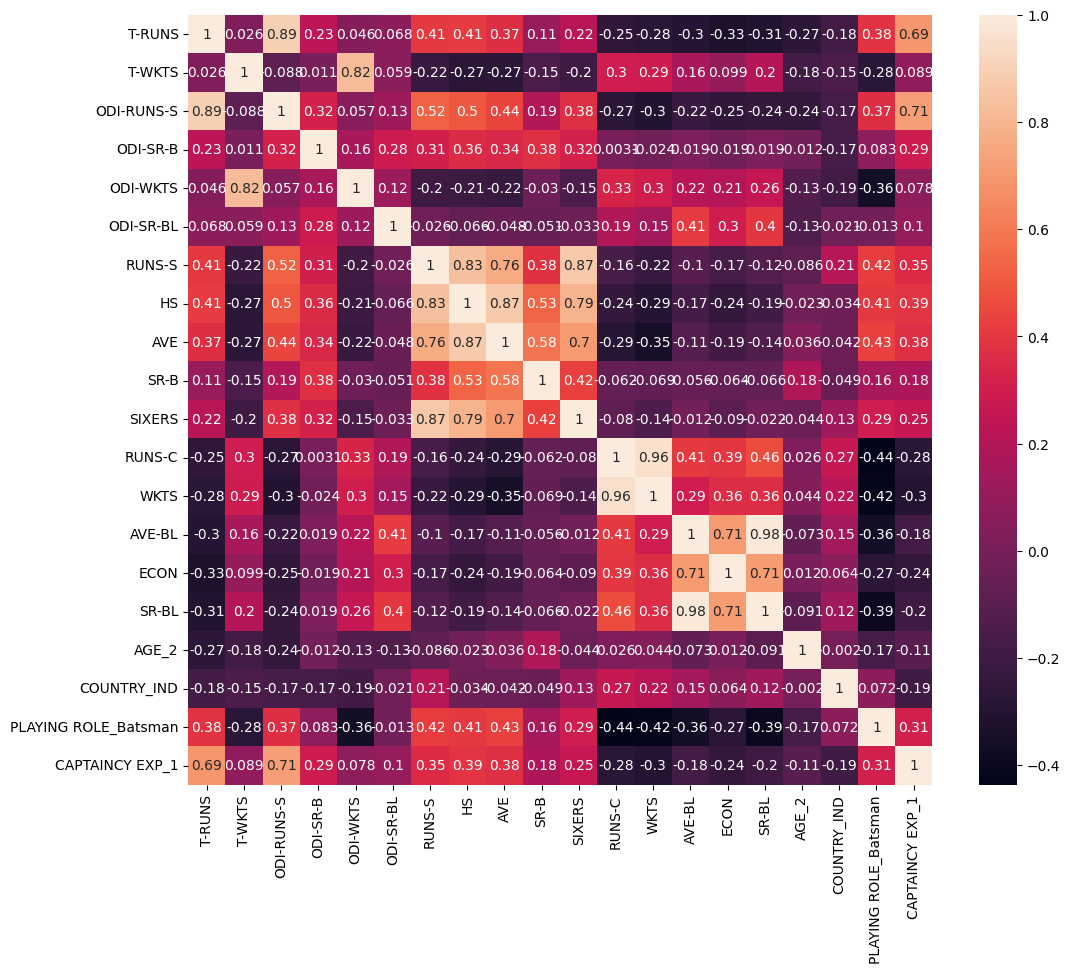

In [27]:
# This cell contains code for step 33
plt.figure( figsize= (12,10))
sn.heatmap(X[columns_with_large_vif].corr() , annot = True)

In [28]:

columns_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S', 'HS',
'AVE', 'RUNS-C', 'SR-B', 'AVE-BL',
'ECON', 'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL']

In [29]:

X_new_features = list(set(X_features) - set(columns_to_be_removed))

## considering the columns where the VIF values are less than 4

In [30]:

get_vif_factors(X[X_new_features])

column       VIF
0     PLAYING ROLE_Batsman  2.680184
1                    AGE_3  1.780011
2              COUNTRY_ENG  1.131775
3                     WKTS  2.882520
4                   SIXERS  2.396949
5               COUNTRY_SA  1.415636
6               COUNTRY_NZ  1.172564
7              COUNTRY_IND  3.143867
8      PLAYING ROLE_Bowler  3.059085
9   PLAYING ROLE_W. Keeper  1.899976
10         CAPTAINCY EXP_1  2.459075
11              COUNTRY_SL  1.519839
12               ODI-SR-BL  2.802249
13             COUNTRY_ZIM  1.205220
14              COUNTRY_WI  1.192958
15             COUNTRY_BAN  1.094077
16                ODI-WKTS  2.743185
17             COUNTRY_PAK  1.334011

In [31]:
# This cell contains code for step 37
X_new_features

['PLAYING ROLE_Batsman',
 'AGE_3',
 'COUNTRY_ENG',
 'WKTS',
 'SIXERS',
 'COUNTRY_SA',
 'COUNTRY_NZ',
 'COUNTRY_IND',
 'PLAYING ROLE_Bowler',
 'PLAYING ROLE_W. Keeper',
 'CAPTAINCY EXP_1',
 'COUNTRY_SL',
 'ODI-SR-BL',
 'COUNTRY_ZIM',
 'COUNTRY_WI',
 'COUNTRY_BAN',
 'ODI-WKTS',
 'COUNTRY_PAK']

In [32]:
# This cell contains code for step 38
train_X = train_X[X_new_features]
ipl_model_2 = sm.OLS(train_y, train_X).fit()

## summary of the model

In [33]:
# This cell contains code for step 39
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.728     
Dependent Variable:         SOLD PRICE         AIC:                           2965.0952 
Date:                       2024-07-29 14:24   BIC:                           3012.6942 
No. Observations:           104                Log-Likelihood:                -1464.5   
Df Model:                   18                 F-statistic:                   16.50     
Df Residuals:               86                 Prob (F-statistic):            1.13e-20  
R-squared (uncentered):     0.775              Scale:                         1.2070e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
PLAYING ROLE_Batsman    121435.5192 106677.8020  1.1383 0.2581  -90632.9324  333503.9708
AGE_3                    -9122.5269  98049.2302 -0.0930 0.9261 -204037.9455  185792.8917
COUNTRY_ENG             682645.6706 216117.2341  3.1587 0.0022  253018.8285 1112272.5128
WKTS                      2431.7954   2104.9101  1.1553 0.2512   -1752.6274    6616.2182
SIXERS                    7861.8754   2085.7886  3.7693 0.0003    3715.4649   12008.2860
COUNTRY_SA              108720.1787 115054.1166  0.9449 0.3473 -119999.8352  337440.1926
COUNTRY_NZ              143103.1354 151783.0999  0.9428 0.3484 -158631.6808  444837.9516
COUNTRY_IND             282632.3214  96182.3486  2.9385 0.0042   91428.1405  473836.5023
PLAYING ROLE_Bowler     -18288.4846 106009.3141 -0.1725 0.8634 -229028.0264  192451.0571
PLAYING ROLE_W. Keeper  -54843.0414 169863.8547 -0.3229 0.7476 -392521.2086  282835.1257
CAPTAINCY EXP_1         208140.5510  98145.7199  2.1207 0.0368   13033.3172  403247.7848
COUNTRY_SL               55647.9077 142271.1093  0.3911 0.6967 -227177.6970  338473.5124
ODI-SR-BL                  919.2605   1268.7453  0.7245 0.4707   -1602.9217    3441.4426
COUNTRY_ZIM             -68453.1947 390791.5483 -0.1752 0.8614 -845321.0811  708414.6916
COUNTRY_WI              -22179.7156 212927.6516 -0.1042 0.9173 -445465.8777  401106.4465
COUNTRY_BAN            -108798.0165 369212.4069 -0.2947 0.7690 -842767.9895  625171.9565
ODI-WKTS                   773.3722    470.6750  1.6431 0.1040    -162.2987    1709.0431
COUNTRY_PAK             122776.9907 159563.0798  0.7695 0.4437 -194423.9137  439977.8952
----------------------------------------------------------------------------------------
Omnibus:                       8.641               Durbin-Watson:                  2.252
Prob(Omnibus):                 0.013               Jarque-Bera (JB):               8.351
Skew:                          0.624               Prob(JB):                       0.015
Kurtosis:                      3.609               Condition No.:                  1491 
========================================================================================
Notes:
[1] R² is computed without centering (uncentered) since the                 model does
not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
[3] The condition number is large, 1.49e+03. This might indicate                that
there are strong multicollinearity or other numerical                problems.
"""

In [34]:
# This cell contains code for step 40
significant_vars = ['COUNTRY_IND','COUNTRY_ENG','SIXERS','CAPTAINCY EXP_1']

In [35]:
# This cell contains code for step 41
train_X = train_X[significant_vars]


# generating the 3rd model

In [36]:
# This cell contains code for step 42
ipl_model_3 = sm.OLS(train_y , train_X).fit()

In [37]:
# This cell contains code for step 43
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2024-07-29 14:24 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================
Notes:
[1] R² is computed without centering (uncentered) since the
model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

# transforming response variable



transformation in MLR is used to address the following issues
1. poor fit ( low r-squared error)
2. residuals do not follow a normal distribution
3. residuals are not homoscedastic
4. found that that there is non linear relationship between independent and dependent variables


In [38]:
# This cell contains code for step 46
import numpy as np
train_y = np.sqrt(train_y)
train_y

70     806.225775
78     308.220700
47     724.568837
0      223.606798
12     632.455532
          ...    
71     894.427191
106    570.087713
14     547.722558
92     474.341649
102    316.227766
Name: SOLD PRICE, Length: 104, dtype: float64

In [39]:
# This cell contains code for step 47
ipl_model_4 = sm.OLS(train_y,train_X).fit()
ipl_model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.741     
Dependent Variable:     SOLD PRICE       AIC:                         1527.9999 
Date:                   2024-07-29 14:24 BIC:                         1538.5775 
No. Observations:       104              Log-Likelihood:              -760.00   
Df Model:               4                F-statistic:                 75.29     
Df Residuals:           100              Prob (F-statistic):          2.63e-29  
R-squared (uncentered): 0.751            Scale:                       1.3550e+05
-----------------------------------------------------------------------------------
                    Coef.      Std.Err.      t       P>|t|      [0.025      0.975] 
-----------------------------------------------------------------------------------
COUNTRY_IND        490.7089     63.9238    7.6765    0.0000    363.8860    617.5318
COUNTRY_ENG        563.0261    217.2801    2.5912    0.0110    131.9486    994.1036
SIXERS               8.5338      1.6995    5.0213    0.0000      5.1620     11.9055
CAPTAINCY EXP_1    417.7575     76.0204    5.4953    0.0000    266.9352    568.5799
--------------------------------------------------------------------------------
Omnibus:                   0.017             Durbin-Watson:                1.879
Prob(Omnibus):             0.992             Jarque-Bera (JB):             0.145
Skew:                      0.005             Prob(JB):                     0.930
Kurtosis:                  2.817             Condition No.:                165  
================================================================================
Notes:
[1] R² is computed without centering (uncentered) since the
model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

# Making predictions on the validation set

In [40]:
# This cell contains code for step 49

predictions = ipl_model_4.predict(test_X[train_X.columns])
predictions


55       51.202584
40      516.310183
19      298.681739
31       25.601292
115      42.668820
56       76.803876
69        0.000000
105     490.708891
81      780.856866
26     1518.613099
95      499.242655
27      682.304230
64      516.310183
4       729.654282
97     1190.477536
100       8.533764
36       93.871404
80      601.647822
93     1582.633791
84      486.027659
18     1104.743009
10      324.283031
120     434.825075
11      417.757547
126     417.757547
45       68.270112
dtype: float64

In [41]:
# This cell contains code for step 50
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_y, predictions))
print('MSE:', metrics.mean_squared_error(test_y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, predictions)))

MAE: 514886.16203879216
MSE: 401103580379.80426
RMSE: 633327.3879912382
